In [1]:
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("Gpu name: "+ gpu.name +"| GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm() 

  Created wheel for gputil: filename=GPUtil-1.4.0-cp36-none-any.whl size=7413 sha256=f505d57733aefd0947e29750c9c1a9fe78e97f513b724a716125f959f80e3740
  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
Successfully built gputil
Gen RAM Free: 12.8 GB  | Proc size: 157.1 MB
Gpu name: Tesla P100-PCIE-16GB| GPU RAM Free: 16280MB | Used: 0MB | Util   0% | Total 16280MB


In [2]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [3]:
!git clone https://github.com/PotatoSpudowski/S.I.D.E.git
%cd S.I.D.E

Cloning into 'S.I.D.E'...
remote: Enumerating objects: 110, done.
remote: Counting objects: 100% (110/110), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 110 (delta 45), reused 91 (delta 26), pack-reused 0
Receiving objects: 100% (110/110), 5.95 MiB | 11.46 MiB/s, done.
Resolving deltas: 100% (45/45), done.
/content/S.I.D.E


In [0]:
!pip install efficientnet
!pip install annoy

In [5]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!cp '/content/drive/My Drive/GCC/val_data.csv' 'Data/'
!cp '/content/drive/My Drive/GCC/validation.zip' 'Data/'

In [0]:
!unzip 'Data/validation.zip' -d 'Data/'

In [0]:
import os
import sys

sys.path.append('..')

import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, BatchNormalization, Activation, Dropout
from tensorflow.keras.losses import CosineSimilarity
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.utils import Sequence
from sklearn.model_selection import train_test_split
from model.model import *
from index_search.index_search import *
from utils.utils import *

In [9]:
model = get_custom_model('B4', 512)

78856192/78856072 [==============================] - 3s 0us/step


In [0]:
se_model = get_sentence_encoder('4')

In [0]:
df = pd.read_csv('Data/val_data.csv')

In [12]:
df.head()

,Unnamed: 0,captions,images
0,0,photograph of the sign being repaired by brave...,validation/Clearwater-Crossing-Shopping-Center...
1,1,the player staring intently at a computer scre...,validation/9066492-3x2-700x467.jpg
2,2,globes : the green 3d person carrying in hands...,validation/carrying-globe-stock-image-1115085.jpg
3,3,the - bedroom stone cottage can sleep people,validation/1415187324676_wps_31_Home_is_a_litt...
4,4,film of a garbage truck,validation/Trista%2002%20007_0.jpg


In [0]:
images, captions = df["images"].tolist(), df["captions"].tolist()

In [0]:
batch_size = 128
data_len = len(images)

In [0]:
x1, x2, y1, y2 = train_test_split(images, captions, test_size=0.1, random_state=0)

In [0]:
training_batch_generator = CustomGenerator(x1, y1, batch_size, se_model)
validation_batch_generator = CustomGenerator(x2, y2, batch_size, se_model)

In [17]:
history = model.fit_generator(generator=training_batch_generator,
                                          steps_per_epoch=(len(x1)//batch_size),
                                          epochs=8,
                                          verbose=1,
                                          validation_data=validation_batch_generator,
                                          validation_steps=(len(x2)//batch_size),
                                          use_multiprocessing=False,
                                          workers=1,
                                          max_queue_size=32)

Instructions for updating:
Please use Model.fit, which supports generators.


Instructions for updating:
Please use Model.fit, which supports generators.


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 99 steps, validate for 11 steps
Epoch 1/8
63/99 [==================>...........] - ETA: 19:54 - loss: -0.1237

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 23 bytes but only got 22. Skipping tag 42036
  " Skipping tag %s" % (size, len(data), tag)


99/99 [==============================] - 3641s 37s/step - loss: -0.1570 - val_loss: -0.2640
Epoch 2/8
99/99 [==============================] - 3609s 36s/step - loss: -0.2633 - val_loss: -0.3178
Epoch 3/8
99/99 [==============================] - 3577s 36s/step - loss: -0.3007 - val_loss: -0.3453
Epoch 4/8
99/99 [==============================] - 3658s 37s/step - loss: -0.3262 - val_loss: -0.3583
Epoch 5/8
99/99 [==============================] - 3664s 37s/step - loss: -0.3446 - val_loss: -0.3682
Epoch 6/8
99/99 [==============================] - 3656s 37s/step - loss: -0.3611 - val_loss: -0.3755
Epoch 7/8
99/99 [==============================] - 3604s 36s/step - loss: -0.3725 - val_loss: -0.3825
Epoch 8/8
99/99 [==============================] - 3610s 36s/step - loss: -0.3832 - val_loss: -0.3882


In [0]:
model.save("custom_model_8_epoch.h5")

In [0]:
!cp 'custom_model_8_epoch.h5' '/content/drive/My Drive/GCC/'

In [0]:
import matplotlib.pyplot as plt

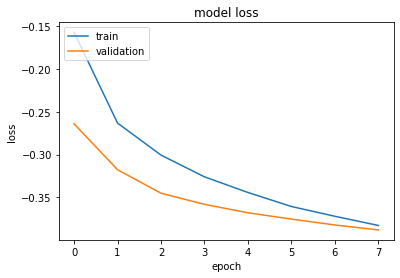

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()